# Rechenaufgaben zu 3.1 (K-Means Clustering)

Sei ein Datensatz gegeben durch:

$$
E=\{(4,3.5),(1.3,1.3),(5,4.7),(3.3,4.5),(6.2,3.9)\}
$$

Wählen Sie (für $k = 2$) als initiale Zentroiden $m_1=(4,3.5)$ und $m_2=(5,4.7)$.

1. Berechnen Sie für alle Punkte in E die Cluster-Zugehörigkeit. Geben Sie für jeden Punkt jeweils die Abstände zu den Zentroiden an.
2. Berechnen Sie die Zentroiden $m_1$ und $m_2$ neu.
3. Berechnen Sie erneut die Clusterzugehörigkeiten und geben Sie an, aus welchen Punkten die resultierenden Cluster bestehen.

## Aufgabe 1

Berechnen Sie für alle Punkte in E die Cluster-Zugehörigkeit. Geben Sie für jeden Punkt jeweils die Abstände zu den Zentroiden an.

In [127]:
import numpy as np

E = [(4, 3.5), (1.3, 1.3), (5, 4.7), (3.3, 4.5), (6.2, 3.9)]
m_1 = (4, 3.5)
m_2 = (5, 4.7)


def dist(point: tuple[float, float], centroid: tuple[float, float]) -> float:
    delta_1 = point[0] - centroid[0]
    delta_2 = point[1] - centroid[1]
    return np.sqrt(delta_1**2 + delta_2**2)


print("m_1:")
for i, point in enumerate(E, start=1):
    formatted_point_dist = f"{dist(point, m_1):0.3f}".replace(".", ",")
    print(f"({i}) ||x_{i}-m_1||: {formatted_point_dist}")

print("\n" + "m_2:")
for i, point in enumerate(E, start=1):
    formatted_point_dist = f"{dist(point, m_2):0.3f}".replace(".", ",")
    print(f"({i}) ||x_{i}-m_2||: {formatted_point_dist}")

m_1:
(1) ||x_1-m_1||: 0,000
(2) ||x_2-m_1||: 3,483
(3) ||x_3-m_1||: 1,562
(4) ||x_4-m_1||: 1,221
(5) ||x_5-m_1||: 2,236

m_2:
(1) ||x_1-m_2||: 1,562
(2) ||x_2-m_2||: 5,025
(3) ||x_3-m_2||: 0,000
(4) ||x_4-m_2||: 1,712
(5) ||x_5-m_2||: 1,442


Zu dem Cluster $C_1$ ordnen also wir die Punkte:

- $x_1$
- $x_2$
- $x_4$

und zu dem Cluster $C_2$ ordnen wir die Punkte:

- $x_3$
- $x_5$

## Aufgabe 2

Berechnen Sie die Zentroiden $m_1$ und $m_2$ neu.

In [144]:
E = [(4, 3.5), (1.3, 1.3), (5, 4.7), (3.3, 4.5), (6.2, 3.9)]
C_1 = [E[0], E[1], E[3]]
C_2 = [E[2], E[4]]


def point_mean(points: list[tuple[float, float]]) -> tuple[float, float]:
    x_mean = sum(x[0] for x in points) / len(points)
    y_mean = sum(x[1] for x in points) / len(points)
    return tuple(np.round((x_mean, y_mean), decimals=3))


m_1_prime = point_mean(C_1)
m_2_prime = point_mean(C_2)

print(f"m_1': {m_1_prime}")
print(f"m_2': {m_2_prime}")

m_1': (2.867, 3.1)
m_2': (5.6, 4.3)


## Aufgabe 3

Berechnen Sie erneut die Clusterzugehörigkeiten und geben Sie an, aus welchen Punkten die resultierenden Cluster bestehen.

In [145]:
def dist(point: tuple[float, float], centroid: tuple[float, float]) -> float:
    delta_1 = point[0] - centroid[0]
    delta_2 = point[1] - centroid[1]
    return np.sqrt(delta_1**2 + delta_2**2)


print("m_1':")
for i, point in enumerate(E, start=1):
    formatted_point_dist = f"{dist(point, m_1_prime):0.3f}".replace(".", ",")
    print(f"({i}) ||x_{i}-m_1'||: {formatted_point_dist}")

print("\n" + "m_2':")
for i, point in enumerate(E, start=1):
    formatted_point_dist = f"{dist(point, m_2_prime):0.3f}".replace(".", ",")
    print(f"({i}) ||x_{i}-m_2'||: {formatted_point_dist}")

m_1':
(1) ||x_1-m_1'||: 1,202
(2) ||x_2-m_1'||: 2,387
(3) ||x_3-m_1'||: 2,666
(4) ||x_4-m_1'||: 1,465
(5) ||x_5-m_1'||: 3,428

m_2':
(1) ||x_1-m_2'||: 1,789
(2) ||x_2-m_2'||: 5,243
(3) ||x_3-m_2'||: 0,721
(4) ||x_4-m_2'||: 2,309
(5) ||x_5-m_2'||: 0,721


Zu dem Cluster $C_1$ ordnen also wir die Punkte:

- $x_1$
- $x_2$
- $x_4$

und zu dem Cluster $C_2$ ordnen wir die Punkte:

- $x_3$
- $x_5$

Dataset:


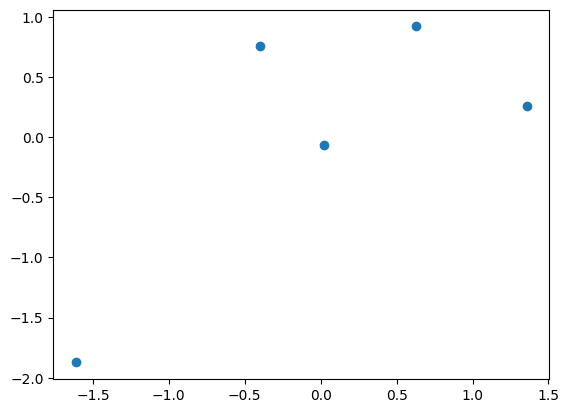

Dataset mit m_1, m_2 (orange):


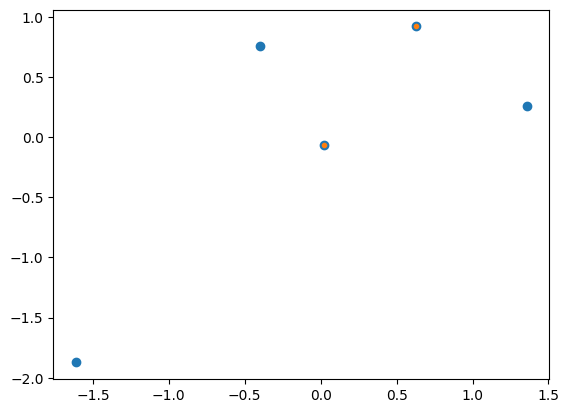

Dataset mit m_1', m_2' (orange):


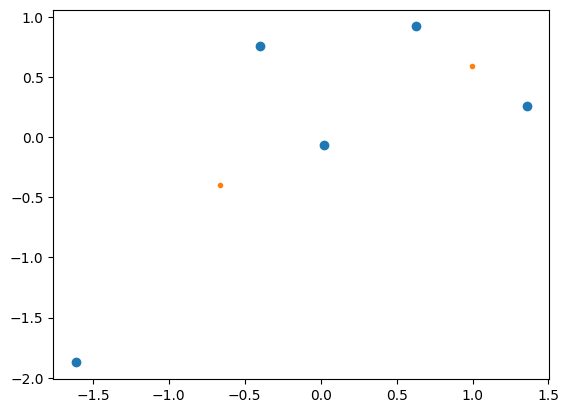

In [146]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.DataFrame(E)
scalar = StandardScaler().fit(df)

df_hat = scalar.transform(df).transpose()

print("Dataset:")
plt.scatter(df_hat[0], df_hat[1])
plt.show()


print("Dataset mit m_1, m_2 (orange):")
centroids = scalar.transform([m_1, m_2]).transpose()
plt.scatter(df_hat[0], df_hat[1])
plt.scatter(centroids[0], centroids[1], marker=".")
plt.show()

print("Dataset mit m_1', m_2' (orange):")
centroids = scalar.transform([m_1_prime, m_2_prime]).transpose()
plt.scatter(df_hat[0], df_hat[1])
plt.scatter(centroids[0], centroids[1], marker=".")
plt.show()